##  Week4 복습과제

Week3에 대한 복습과제입니다.  
데이터셋(train.csv, mushrooms.csv)을 다운 받아주세요!

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 'train.csv'으로 train_df를 생성하세요.

In [23]:
train_df = pd.read_csv("/content/train.csv")

#### 데이터 보정을 위해 다음 코드를 실행시켜 주세요.

In [24]:
# id 제외

train_df = train_df.drop("id", axis = 1)

#### LabelEncoder를 사용해 color, type column을 인코딩한 train_df를 만드시오.

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
train_df['color'] = encoder.fit_transform(train_df['color'])

encoder= LabelEncoder()
train_df['type'] = encoder.fit_transform(train_df['type'])

print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bone_length    371 non-null    float64
 1   rotting_flesh  371 non-null    float64
 2   hair_length    371 non-null    float64
 3   has_soul       371 non-null    float64
 4   color          371 non-null    int64  
 5   type           371 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 17.5 KB
None


#### feature간의 상관관계를 확인하는 heatmap을 출력하시오.

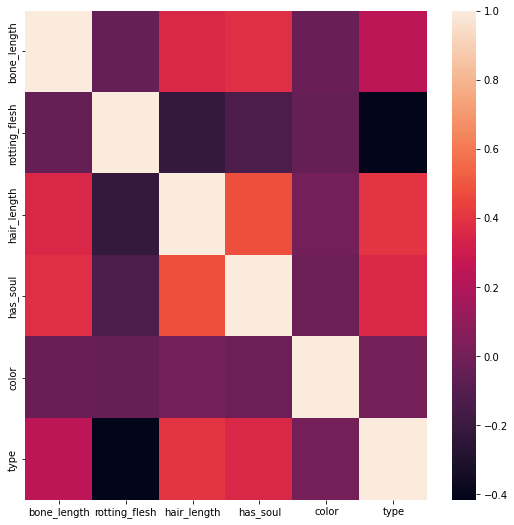

In [26]:
import seaborn as sns

plt.figure(figsize=(9,9))
data = train_df.corr()
sns.heatmap(data)

#### 독립변수(X)와 종속변수(y-type)로 분리해주세요(iloc 또는 loc 활용) 그리고 확인해주세요.
#### X와 y를 X_train, X_test, y_train, y_test으로 나누시오. (test_size=0.2, random_state=12) 

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

#### Gradient Boost를 활용하여 train 세트를 fit 한 후 test 세트로 예측의 정확도를 출력하시오. (random_state=0,n_estimators=50,learning_rate=0.5)


In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [30]:
gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuarcy = accuracy_score(y_test, gb_pred)

print(gb_accuarcy)

0.7333333333333333


#### GBM 하이퍼 파라미터 튜닝을 한 후, 최적의 하이퍼 파라미터를 구하고 정확도를 출력하시오. 위의 값과 정확도를 비교하시오. 이때 n_estimators는 50,100,500, learning_rate는 0.005, 0.1, 0.5,1,10 을 변수로 넣으시오.(gridsearchCV이용,cv=2,verbose=1)

In [31]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[50,100,500], 'learning_rate':[0.005,0.1,0.5,1,10]}

grid_cv = GridSearchCV(gb_clf, params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 파라미터 : ',grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 15 candidates, totalling 30 fits
최적 파라미터 :  {'learning_rate': 0.005, 'n_estimators': 500}
최고 예측 정확도 : 0.7095


#### 사이킷런 래퍼 클래스 XGBoost를 사용해 train 세트를 fit 한 후 test 세트로 예측의 정확도를 출력하시오. (n_estimators=400, learning_rate = 0.1, max_depth = 3)

In [32]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

In [33]:
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.68


#### 사이킷런 래퍼 클래스 LightGBM를 사용해 train 세트를 fit 한 후 test 세트로 예측의 정확도를 출력하시오. 

n_estimators=400
조기 중단 파라미터: early_stopping_rounds=100, eval_metric="logloss",  eval_set=evals 

In [34]:
import lightgbm
from lightgbm import LGBMClassifier

evals = [(X_test, y_test)]
lgbm = LGBMClassifier(n_estimators=400)
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals)
pred = lgbm.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

[1]	valid_0's multi_logloss: 1.06078	valid_0's multi_logloss: 1.06078
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 1.01605	valid_0's multi_logloss: 1.01605
[3]	valid_0's multi_logloss: 0.98745	valid_0's multi_logloss: 0.98745
[4]	valid_0's multi_logloss: 0.961302	valid_0's multi_logloss: 0.961302
[5]	valid_0's multi_logloss: 0.935948	valid_0's multi_logloss: 0.935948
[6]	valid_0's multi_logloss: 0.905585	valid_0's multi_logloss: 0.905585
[7]	valid_0's multi_logloss: 0.881196	valid_0's multi_logloss: 0.881196
[8]	valid_0's multi_logloss: 0.860414	valid_0's multi_logloss: 0.860414
[9]	valid_0's multi_logloss: 0.839374	valid_0's multi_logloss: 0.839374
[10]	valid_0's multi_logloss: 0.825518	valid_0's multi_logloss: 0.825518
[11]	valid_0's multi_logloss: 0.813205	valid_0's multi_logloss: 0.813205
[12]	valid_0's multi_logloss: 0.807044	valid_0's multi_logloss: 0.807044
[13]	valid_0's multi_logloss: 0.80155	valid_0's multi_logloss: 0.80155
[14]	

## Stacking 실습

CV set 기반 stacking을 통해 앙상블 모델을 만드려고 합니다.    
개별 모델이 교차검증을 통해 최종 모델이 사용할 학습용, 테스트용 데이터를 만드는 함수를 생성하시오.
```
def get_stacking_dataset(model, X_train, y_train, X_test, n_folds):
    return train_fold_pred , test_pred_mean
```

In [60]:
from sklearn.model_selection import KFold
import numpy as np
def get_stacking_dataset(model, X_train_n, y_train_n, X_test_n, n_folds):
  kf = KFold(n_splits = n_folds, shuffle = False)
  train_fold_pred = np.zeros((X_test_n.shape[0], n_folds))
  test_pred_mean = np.zeros((X_test.shape[0],n_folds))

  for fold_cnt, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
    X_tr = X_train[train_index]
    y_tr = y_train[train_index]
    X_val = X_train[valid_index]

    model.fit(X_tr, y_tr)
    train_fold_pred[valid_index, :] = model.predict(X_val).reshape(-1,1)
    test_pred_mean[:,fold_cnt] = model.predict(X_test)

  test_pred_mean = np.mean(test_pred_mean, axis=1).reshape(-1,1)

  return train_fold_pred, test_pred_mean

스태킹에 사용될 개별 모델을 생성하시오.

개별 모델:  KNN(n_neighbors=4), 랜덤 포레스트(n_estimators=100, random_state=0), 결정 트리, AdaBoost(n_estimators=100), LightGBM(n_estimators=400)

최종 모델: 로지스틱 회귀 (C=10)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)
lgbm_clf = LGBMClassifier(n_estimators=400)

lr_final = LogisticRegression(C=10)

위에서 생성한 함수를 사용해 개별 모델을 학습, 예측시켜 메타모델에 사용될 학습용 데이터와 테스트용 데이터를 생성하고, 스태킹하시오.  
fold 수 = 6  
학습용 데이터 : stacked_X_train  
테스트용 데이터 : stacked_X_test

In [74]:
knn_train, knn_test = get_stacking_dataset(knn_clf, X_train, y_train, X_test, 6)
rf_train, rf_test = get_stacking_dataset(rf_clf, X_train, y_train, X_test, 6)
dt_train, dt_test = get_stacking_dataset(dt_clf, X_train, y_train, X_test, 6)
ada_train, ada_test = get_stacking_dataset(ada_clf, X_train, y_train, X_test, 6)
lgbm_train,lgbm_test = get_stacking_dataset(lgbm_clf, X_train, y_train, X_test, 6)

NameError: ignored

In [63]:
stacked_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train, lgbm_train ), axis=1)
stacked_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test, lgbm_test ), axis=1)

print('Original train / test : ', X_train.shape, ' / ', X_test.shape)
print('Stacking train / test : ', stacked_X_train.shape, ' / ', stacked_X_test.shape)

NameError: ignored

최종 모델 (logistic regression)을 학습시키고, 정확도를 구하시오.

In [64]:
lr_final.fit(stacked_X_train, y_train)
pred = lr_final.predict(stacked_X_test)
accuracy = accuracy_score(y_test, pred)
print('정확도 : {0:.4f}'.format(accuracy))

NameError: ignored

### CatBoost

범주형 변수가 많은 데이터에 catboost를 적용해봅시다.

데이터 출처:
https://www.kaggle.com/datasets/uciml/mushroom-classification


In [65]:
# mushrooms.csv 파일을 사용합니다.

mushroom_df = pd.read_csv('/content/mushrooms.csv')

mushroom_df feature들의 data type을 확인하시오.

In [66]:
mushroom_df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [84]:
for i in mushroom_df.columns:
  encoder= LabelEncoder()
  mushroom_df[i] = encoder.fit_transform(mushroom_df[i])
print(mushroom_df.head())

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0         

feature와 target을 각각 X_mushroom, y_mushroom으로 분리하고,  
train_test_split 함수로 train, test set을 분리하시오. (test size = 0.2)

In [85]:
X_mushroom = mushroom_df.drop(['class'],axis=1,inplace=False)
y_mushroom = mushroom_df['class']
X_train, X_test, y_train, y_test = train_test_split(X_mushroom, y_mushroom, test_size=0.2)

CatBoostClassifier를 불러오고, Pool 함수를 이용해 범주형 변수를 처리하도록 train_pool, test_pool을 만드시오.

In [69]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [86]:
from catboost import Pool

In [87]:
pool_train = Pool(data = X_train, label = y_train)
pool_test = Pool(data = X_test, label = y_test)

iteration=400, learning_rate=0.1, max_depth=3로 설정한 CatBoost 모델로 버섯에 대한 정보를 학습하고 테스트 데이터 버섯의 독성 여부를 예측하시오. 또 정확도를 구하시오.  

In [88]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier(iterations=400, learning_rate=0.1, max_depth=3)
cb_clf.fit(pool_train)
pred = cb_clf.predict(pool_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0:	learn: 0.5280291	total: 48.8ms	remaining: 19.5s
1:	learn: 0.4129672	total: 51.6ms	remaining: 10.3s
2:	learn: 0.3322250	total: 53.7ms	remaining: 7.11s
3:	learn: 0.2597293	total: 55.8ms	remaining: 5.53s
4:	learn: 0.2210379	total: 58ms	remaining: 4.58s
5:	learn: 0.1704807	total: 60.1ms	remaining: 3.95s
6:	learn: 0.1484198	total: 62.8ms	remaining: 3.52s
7:	learn: 0.1298162	total: 64.7ms	remaining: 3.17s
8:	learn: 0.1193319	total: 66.8ms	remaining: 2.9s
9:	learn: 0.1060741	total: 68.9ms	remaining: 2.69s
10:	learn: 0.0955247	total: 71ms	remaining: 2.51s
11:	learn: 0.0858616	total: 73.1ms	remaining: 2.36s
12:	learn: 0.0793629	total: 75.3ms	remaining: 2.24s
13:	learn: 0.0700731	total: 77.8ms	remaining: 2.15s
14:	learn: 0.0649097	total: 79.8ms	remaining: 2.05s
15:	learn: 0.0595324	total: 81.9ms	remaining: 1.97s
16:	learn: 0.0552749	total: 83.9ms	remaining: 1.89s
17:	learn: 0.0516725	total: 85.7ms	remaining: 1.82s
18:	learn: 0.0488304	total: 87.8ms	remaining: 1.76s
19:	learn: 0.0475856	total:

수고하셨습니다!